# WineQuality K means Clustering

## Data Preprocess

In [6]:
# Load the data
df1 <- read.csv('winequality-red.csv', sep=';')
df2 <- read.csv('winequality-white.csv', sep=';')
df1$label <- 'red'
df2$label <- 'white'

In [7]:
head(df1)
head(df2)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,red


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6,white
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6,white
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,white
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,white
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,white
6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,white


In [8]:
# Combine two dataframe into one
library(dplyr)
wine <-bind_rows(df1, df2)
str(wine)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




'data.frame':	6497 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ label               : chr  "red" "red" "red" "red" ...


## Exploratory Data Analysis

##### Histogram of residual sugar

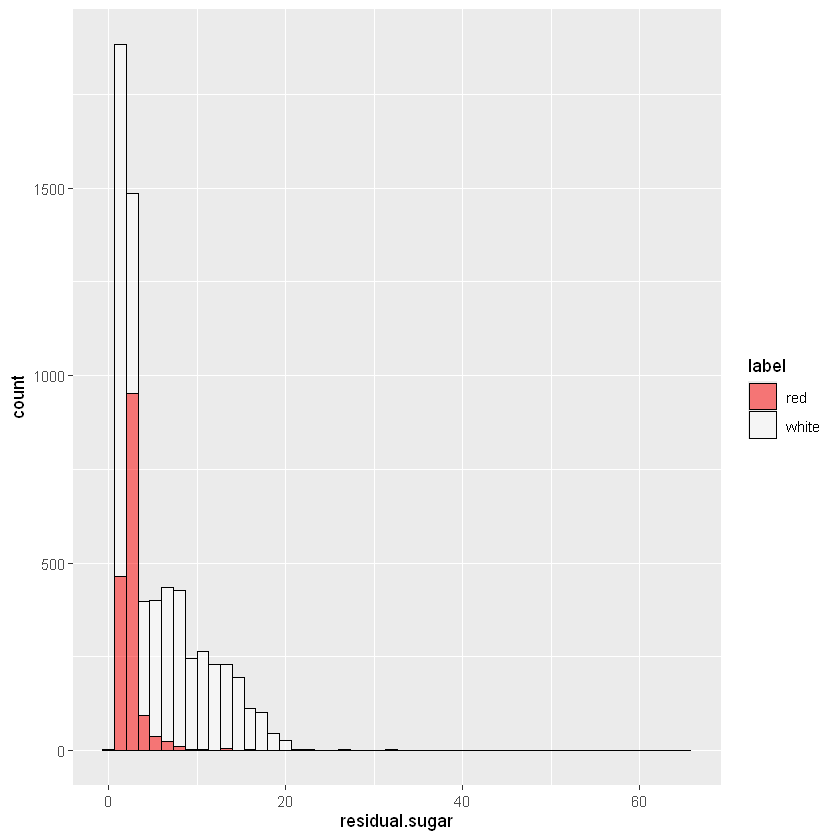

In [32]:
library(ggplot2)
pl <- ggplot(wine, aes(x=residual.sugar, fill=label)) + geom_histogram(color='black', bins=50, alpha = 0.5,position = position_stack(reverse=T)) + scale_fill_manual(values=c('red' ,'white'))
print(pl)

##### Histogram of citric acid

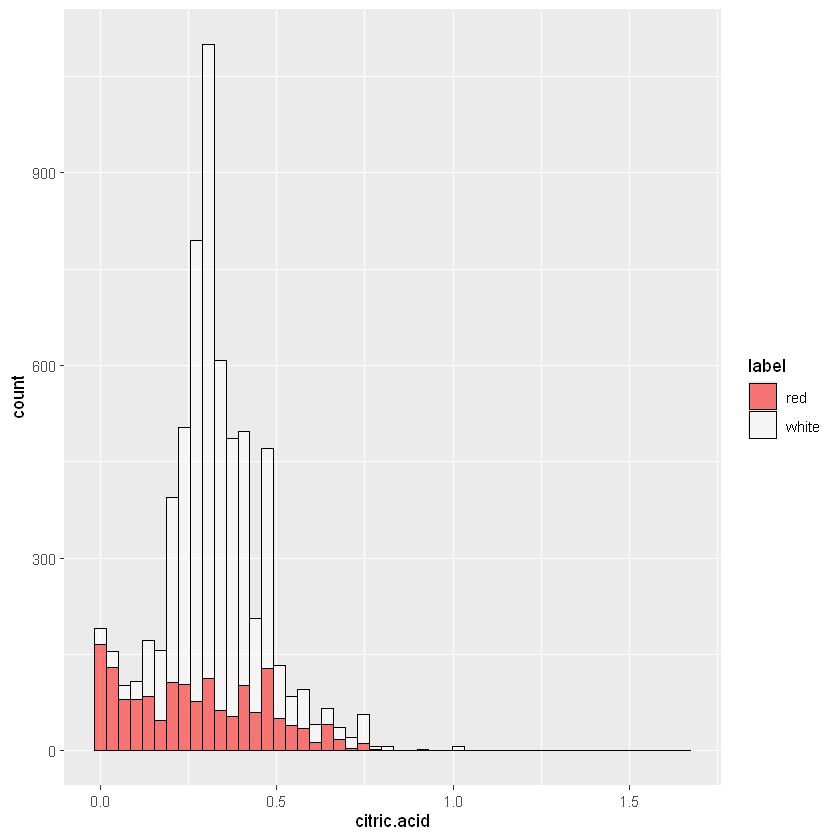

In [15]:
pl2 <- ggplot(wine, aes(x=citric.acid, fill = label)) + geom_histogram(color='black', bins=50, position = position_stack(reverse=T), alpha=0.5) + scale_fill_manual(values =c('red','white'))
print(pl2)

##### Histogram of alcohol

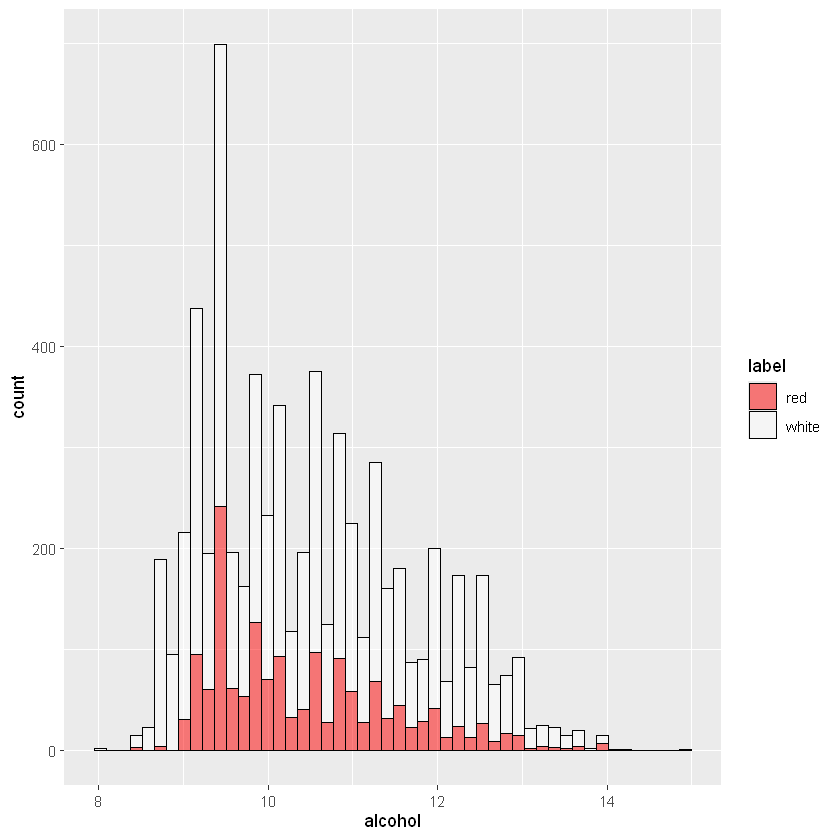

In [16]:
pl3 <- ggplot(wine, aes(x=alcohol, fill = label)) + geom_histogram(color='black', bins=50, position = position_stack(reverse=T), alpha=0.5) + scale_fill_manual(values =c('red','white'))
print(pl3)

##### Scatter plot of residual sugat versus citric.acid

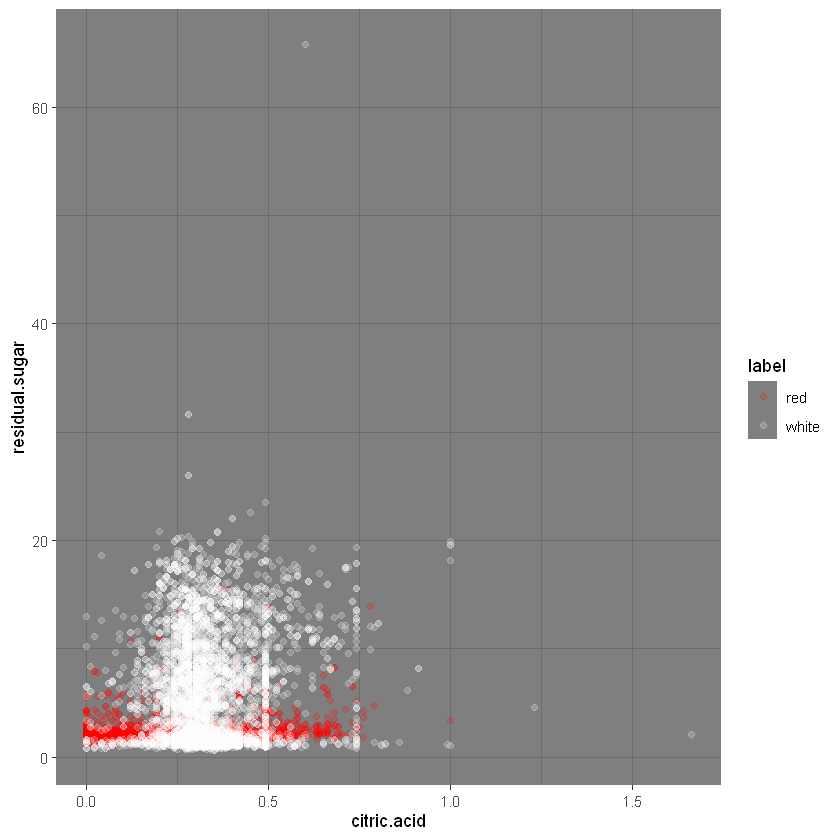

In [25]:
pl4 <- ggplot(wine, aes(x=citric.acid, y=residual.sugar, color=label)) + geom_point(alpha=0.2) + scale_color_manual(values=c('red','white')) + theme_dark()
pl4

* red wines appear to have lower residual sugar overall
* white wines have a wide range of residual sugar values, including many high values
* white wines show higher citric acid variability, while red wines are more concentrated in the lower range.


##### Scatter plot of volatile.acidity vs. residual.sugar

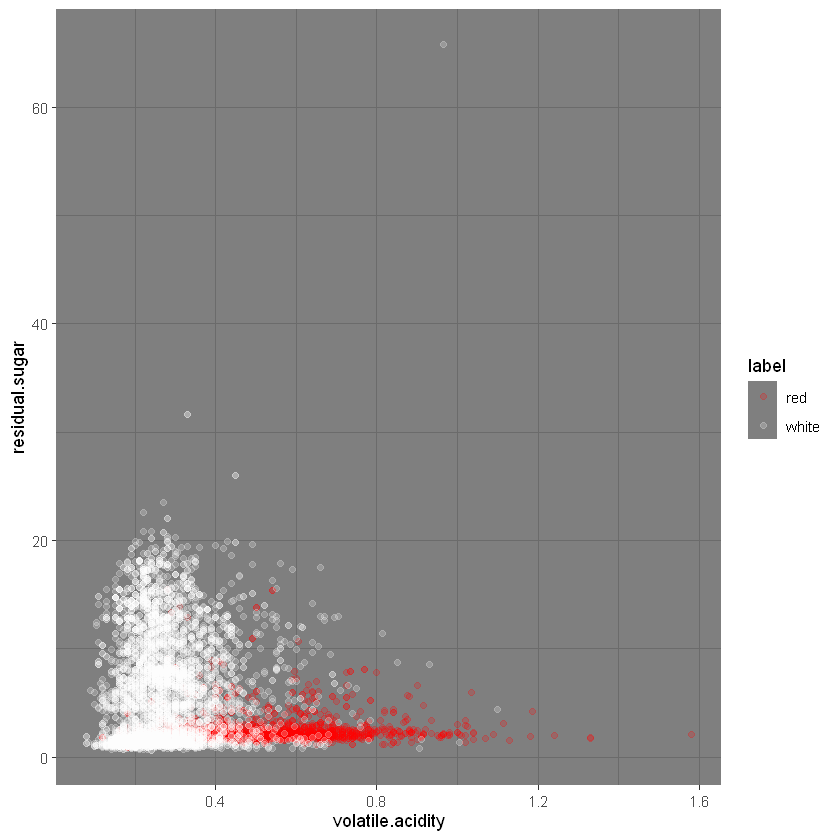

In [26]:
pl5 <- ggplot(wine, aes(x=volatile.acidity, y=residual.sugar, color=label)) + geom_point(alpha=0.2) + scale_color_manual(values=c('red','white')) + theme_dark()
pl5

* Red wines are more concentrated in the higher volatile acidity range while white wines are mostly below 0.5

In [27]:
# Prepare data without labels
clus.data <- wine %>% select(-label)
head(clus.data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


## Build Cluster

In [29]:
set.seed(101)
wine.cluster <- kmeans(clus.data, centers=2, nstart=20)
print(wine.cluster)

K-means clustering with 2 clusters of sizes 2808, 3689

Cluster means:
  fixed.acidity volatile.acidity citric.acid residual.sugar  chlorides
1      7.623219        0.4086378   0.2908725       3.076425 0.06580983
2      6.904812        0.2871659   0.3397642       7.244809 0.04859257
  free.sulfur.dioxide total.sulfur.dioxide   density       pH sulphates
1            18.39868             63.26318 0.9945736 3.254882 0.5724145
2            39.75590            155.69246 0.9947903 3.190808 0.4999485
   alcohol  quality
1 10.79722 5.810541
2 10.25932 5.824343

Clustering vector:
   [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
  [38] 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 [112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 [149] 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [186] 1 1 1 2 

##### Evaluation

In [31]:
# Compare the cluster with the actual label
table(wine$label,wine.cluster$cluster)

       
           1    2
  red   1514   85
  white 1294 3604